In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

# Sinusoidal response

In this notebook we will look at the response of first and second order systems to sinusoidal inputs. Recall that we always assume inputs were zero for times less than zero, so in fact the input looks like this:

$$u_{sin}(t) = \begin{cases}0 & t<0\\A\sin(\omega t) & t \geq 0 \end{cases}$$

We will define our symbols in such a way that the positive $t$ is assumed and Sympy will do the math correctly.

In [2]:
A, t, omega = sympy.symbols('A, t, omega', positive=True)
s = sympy.Symbol('s')

So we can define our input like this and get the same Laplace transform as in our table of standard transforms:

In [3]:
usin = A*sympy.sin(t*omega)

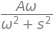

In [4]:
usin_s = sympy.laplace_transform(usin, t, s, noconds=True)
usin_s

## First order 
Let's explore how first order systems respond to this kind of input:

In [5]:
K, tau = sympy.symbols('K, tau', positive=True)

In [6]:
G = K/(tau*s + 1)

In [7]:
y = G*usin_s

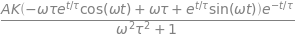

In [8]:
yt = sympy.inverse_laplace_transform(y, s, t)
yt

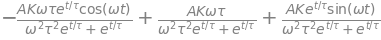

In [9]:
yt = yt.simplify().expand()
yt

In [10]:
def response(omega_, A_, tau_, K_):
    sympy.plot(usin.subs({omega: omega_, A: A_}), 
               yt.subs({A: A_, tau: tau_, K: K_, omega: omega_}), 
               (t, 0, 30), ylim=(-2, 2))

In [11]:
from ipywidgets import interact

In [12]:
interact(response, 
         omega_=(0.1, 10.), 
         A_=(0.1, 2.), 
         tau_=(0.1, 10.), 
         K_=(-0.1, 2.))

interactive(children=(FloatSlider(value=5.05, description='omega_', max=10.0, min=0.1), FloatSlider(value=1.05…

<function __main__.response(omega_, A_, tau_, K_)>

We see the response is eventually sinusoidal.

Second order sinusoidal response
----------------

In [13]:
zeta = sympy.Symbol('zeta', positive=True)

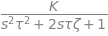

In [14]:
G2 = K/(tau**2*s**2 + 2*tau*zeta*s + 1)
G2

Sympy can calculate this response analytically.

**Warning:** This next cell takes quite a long time.

In [15]:
yt = sympy.inverse_laplace_transform(G2*usin_s, s, t)

In [16]:
def response(omega_, A_, K_, tau_, zeta_):
    sympy.plot(usin.subs({omega: omega_, A: A_}), 
               yt.subs({A: A_, tau: tau_, K: K_, zeta: zeta_, omega: omega_}), 
               (t, 0, 20), ylim=(-2, 2))

In [17]:
interact(response, 
         omega_=(0.1, 10.), 
         A_=(0.1, 2.), 
         tau_=(0.1, 10.), 
         K_=(-0.1, 2.),
         zeta_=(0.1, 1.2))

interactive(children=(FloatSlider(value=5.05, description='omega_', max=10.0, min=0.1), FloatSlider(value=1.05…

<function __main__.response(omega_, A_, K_, tau_, zeta_)>

Again we see that the response is eventually sinusoidal, with a longer transient. Unlike the first order system, there are frequencies where the output is larger than the input when the system is underdamped. This is known as a harmonic response:

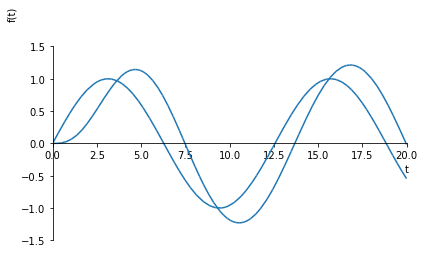

In [18]:
response(0.5, 1, 1, 1.1, 0.4)

## Amplitude over frequency

It can be shown (unfortunately SymPy is not quite up to the task) that for first order processes, the eventual magnitude of the sinusoidal responses are as follows:

<table width="100%">
<tr><td>First order processes</td><td>$$\frac{KA}{\sqrt{\omega^2 \tau^2 + 1}}$$</td></tr>
<tr><td>Second order processes</td><td>$$\frac{KA}{\sqrt{(1 - \omega^2 \tau^2)^2 + (2\zeta\omega\tau)^2}}$$</td></tr>

It is useful to plot the normalised amplitude ratio (the above amplitudes divided by $KA$) of the two systems as a function of frequency:

In [19]:
firstorder = 1/sympy.sqrt(omega**2*tau**2 + 1)
secondorder = 1/sympy.sqrt((1 - omega**2*tau**2)**2 + (2*zeta*omega*tau)**2)

In [20]:
def frequencyplot(tau_, zeta_):
    sympy.plot(firstorder.subs({tau: tau_}), 
               secondorder.subs({tau: tau_, zeta: zeta_}), 
               (omega, 0.1, 10), 
               xscale='log',
              )

In [21]:
interact(frequencyplot, tau_=(0.01, 4), zeta_=(0.1, 1.2))

interactive(children=(FloatSlider(value=2.005, description='tau_', max=4.0, min=0.01), FloatSlider(value=0.649…

<function __main__.frequencyplot(tau_, zeta_)>

It is clear that the value of $\tau$ determines the frequency of the peak in the second order plot. This peak is known as the "harmonic nose" and is only larger than 1 when $0<\zeta<0.7$.

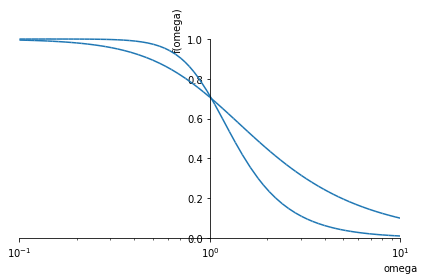

In [22]:
frequencyplot(1, 0.7)

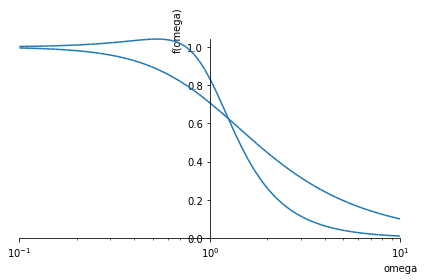

In [23]:
frequencyplot(1, 0.6)